In [2]:
import scrapy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [5]:
url = "https://www.datacamp.com/community/tutorials"
html = urlopen(url)
soup = BeautifulSoup(html, 'html')

pages = [i.text for i in soup.find_all('a') if 'community/tutorials?page=' in str(i)]
lastpage = pages[-1]

In [21]:
pages

['2', '3', '4', '5', '6', '7', '24']

In [6]:
print(lastpage)

24


In [8]:
url2 = 'http://zpp.rospotrebnadzor.ru/Forum/Appeals'

In [11]:
import requests
requests.get(url2)

<Response [200]>

In [12]:
response = requests.get(url2)

In [13]:
response.content

b'<!DOCTYPE html>\r\n<html>\r\n<head>\r\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n    <meta charset="utf-8" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n    <meta name="description">\r\n    <meta name="keywords">\r\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n    <meta name="sputnik-verification" content="lH6Z9PWIRq3180Y6" />\r\n    <title>\xd0\xa1\xd0\xbf\xd0\xb8\xd1\x81\xd0\xbe\xd0\xba \xd1\x81\xd0\xbe\xd0\xbe\xd0\xb1\xd1\x89\xd0\xb5\xd0\xbd\xd0\xb8\xd0\xb9 - \xd0\x92\xd0\xb8\xd1\x80\xd1\x82\xd1\x83\xd0\xb0\xd0\xbb\xd1\x8c\xd0\xbd\xd0\xb0\xd1\x8f \xd0\xbf\xd1\x80\xd0\xb8\xd0\xb5\xd0\xbc\xd0\xbd\xd0\xb0\xd1\x8f - \xd0\xa0\xd0\xbe\xd1\x81\xd0\xbf\xd0\xbe\xd1\x82\xd1\x80\xd0\xb5\xd0\xb1\xd0\xbd\xd0\xb0\xd0\xb4\xd0\xb7\xd0\xbe\xd1\x80</title>\r\n    <link href="/fonts/firasans/firasans.css" rel="stylesheet" />\r\n    <!--[if lt IE 9]>\r\

In [14]:
response.encoding = 'utf-8' # Optional: requests infers this internally
response.text

'<!DOCTYPE html>\r\n<html>\r\n<head>\r\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n    <meta charset="utf-8" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n    <meta name="description">\r\n    <meta name="keywords">\r\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n    <meta name="sputnik-verification" content="lH6Z9PWIRq3180Y6" />\r\n    <title>Список сообщений - Виртуальная приемная - Роспотребнадзор</title>\r\n    <link href="/fonts/firasans/firasans.css" rel="stylesheet" />\r\n    <!--[if lt IE 9]>\r\n    <script src="http://ie7-js.googlecode.com/svn/version/2.1(beta4)/IE9.js"></script>\r\n    <![endif]-->\r\n\r\n    <link href="/Skin/rpn2/font/font.css" rel="stylesheet"/>\r\n\r\n    <link href="/Content/font-awesome.min.css" rel="stylesheet"/>\r\n\r\n    <link href="/Content/css?v=NQGD633p8LVb3M5_IWEqJHuZWbhsiDqS1PMl-WIDzL01" rel="styles

 <div class="col-md-12">\r\n<div class="appeal-element">\r\n    <div class="row">\r\n        <div class="col-md-12">\r\n            <p class="appeal-cat-title">Розничная торговля</p>\r\n        </div>\r\n    </div>\r\n    <div class="row">\r\n        <div class="col-md-12">\r\n            <a href="/Forum/Appeals/Details/12781" class="appeal-title-link">\r\n                <span class="custom-underline">\r\n                    Продажа брака в авто магазине.\r\n                </span>\r\n            </a>\r\n        </div>\r\n    </div>\r\n    <div class="row">\r\n        <div class="col-md-12">\r\n            <p class="appeal-element-bottom"><span> Опубликовано: </span> 22.10.2019</p>\r\n<p class="appeal-element-bottom"><span> Автор: </span> Анна</p>            <p class="appeal-element-bottom"><span> Регион: </span> Белгородская область</p>        </div>\r\n    </div>\r\n</div>\r\n                </div>\r\n  

In [15]:
" <div class="col-md-12">\r\n<div class="appeal-element">\r\n    <div class="row">\r\n        <div class="col-md-12">\r\n            <p class="appeal-cat-title">Розничная торговля</p>\r\n        </div>\r\n    </div>\r\n    <div class="row">\r\n        <div class="col-md-12">\r\n            <a href="/Forum/Appeals/Details/12781" class="appeal-title-link">\r\n                <span class="custom-underline">\r\n                    Продажа брака в авто магазине.\r\n                </span>\r\n            </a>\r\n        </div>\r\n    </div>\r\n    <div class="row">\r\n        <div class="col-md-12">\r\n            <p class="appeal-element-bottom"><span> Опубликовано: </span> 22.10.2019</p>\r\n<p class="appeal-element-bottom"><span> Автор: </span> Анна</p>            <p class="appeal-element-bottom"><span> Регион: </span> Белгородская область</p>        </div>\r\n    </div>\r\n</div>\r\n                </div>\r\n  "

SyntaxError: invalid syntax (<ipython-input-15-ddb5488dbd66>, line 1)

In [16]:
url2 = "http://zpp.rospotrebnadzor.ru/Forum/Appeals"
html2 = urlopen(url2)
soup2 = BeautifulSoup(html2, 'html')

pages2 = [i.text for i in soup2.find_all('a') if '/Forum/Appeals/Details/' in str(i)]
lastpage2 = pages2[-1]

In [17]:
print(lastpage2)



                    Оказание мед.услуг без лицензии
                



In [18]:
html2

In [19]:
soup2

<!DOCTYPE html>
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta name="description"/>
<meta name="keywords"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="lH6Z9PWIRq3180Y6" name="sputnik-verification"/>
<title>Список сообщений - Виртуальная приемная - Роспотребнадзор</title>
<link href="/fonts/firasans/firasans.css" rel="stylesheet"/>
<!--[if lt IE 9]>
    <script src="http://ie7-js.googlecode.com/svn/version/2.1(beta4)/IE9.js"></script>
    <![endif]-->
<link href="/Skin/rpn2/font/font.css" rel="stylesheet"/>
<link href="/Content/font-awesome.min.css" rel="stylesheet"/>
<link href="/Content/css?v=NQGD633p8LVb3M5_IWEqJHuZWbhsiDqS1PMl-WIDzL01" rel="stylesheet"/>
<script src="/bundles/modernizr?v=inCVuEFe6J4Q07A0AcRsbJic_UE5MwpRMNGcOtk94TE1"></script>
<link href="/Skin/rpn2/c

In [20]:
pages2

['\n\r\n                    Продажа брака в авто магазине.\r\n                \n',
 '\n\r\n                    Мошенники\r\n                \n',
 '\n\r\n                    Здравствуйте! Возможно ли обменять наушники, флешку и колонку, если не подошли?\r\n                \n',
 '\n\r\n                    Обман при продаже обуви.\r\n                \n',
 '\n\r\n                    Оказание мед.услуг без лицензии\r\n                \n']

var currentPage = 1;
    var pageCount = 2033;

In [2]:
description=[]
upvote=[]
author=[]
publishdate=[]
title=[]

In [28]:
for cp in np.arange(1,int(lastpage)+1):
    url = "https://www.datacamp.com/community/tutorials?page=" + str(cp)
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html')
    description.append([i.text for i in soup.find_all(class_='jsx-379356511 blocText description')])
    upvote.append([i.text for i in soup.find_all(class_='jsx-4192737526 voted')])
    author.append([i.text for i in soup.find_all(class_='jsx-566588255 name')])
    publishdate.append([i.text for i in soup.find_all(class_='jsx-566588255 date')])
    title.append([i.text for i in soup.find_all(class_='jsx-379356511 blue')])
    time.sleep(3)
print ("Done!")

Done!


Set the url to a variable
Opened the url using urlopen which was imported earlier
Scraped the specified page and assigned it to soup variable
Identified and extracted values for Description, Up Vote, Author, Publish Date, Title by using their relevant class names. These class names were found using Developer Tools
The time function has been used to be easy on the website this time :)

In [29]:
#Flattening List of Lists
descriptionflat = [y for x in description for y in x]
upvoteflat = [y for x in upvote for y in x]
authorflat = [y for x in author for y in x]
publishdateflat = [y for x in publishdate for y in x]
titleflat = [y for x in title for y in x]
publishdateformatted = [datetime.strptime(re.sub('rd, ', ', ', re.sub('st, ', ', ', re.sub('nd, ', ', ', re.sub('th, ',', ',a)))), "%B %d, %Y") for a in publishdateflat]

In [35]:
lst = [descriptionflat, upvoteflat, authorflat, publishdateformatted, titleflat]
lengths_of_data = [len(i) for i in lst]

In [36]:
print(lengths_of_data)

[348, 0, 348, 348, 348]


In [37]:
#Making a Data Frame and Saving as CSV File
cdata = {"author":authorflat,"publishdate":publishdateformatted,"title":titleflat,"description":descriptionflat}
df = pd.DataFrame(data = cdata)
df.to_csv("datacamp241019.csv", header=True, index=False)

In [38]:
datacamp = pd.read_csv("datacamp241019.csv", parse_dates=["publishdate"], infer_datetime_format=True)

In [39]:
datacamp.shape

(348, 4)

In [40]:
datacamp.head()

,author,publishdate,title,description
0,Aditya Sharma,2019-10-22,Scala Classes and Objects,"In this tutorial, you will learn about the fun..."
1,Olivia Smith,2019-10-22,Variables in Scala,"Learn about Scala's variables, rules for defin..."
2,Aditya Sharma,2019-10-04,Lists in Scala,Learn what lists are and how they can be lever...
3,Francisco Javier Carrera Arias,2019-10-03,Building Data Pipelines using R,Learn how to transform and load (ETL) a data ...
4,Aditya Sharma,2019-09-20,Operators in Scala,Learn about the different operators used in th...


In [41]:
datacamp['publishyymm'] = datacamp['publishdate'].dt.strftime("%Y-%b")
datacamp["posts"] = 1

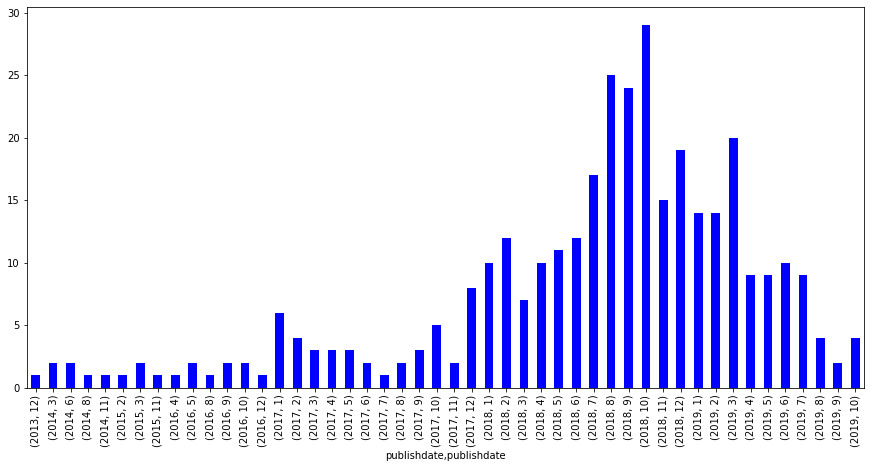

In [42]:
datacamp.groupby([datacamp['publishdate'].dt.year, datacamp['publishdate'].dt.month]).size().plot(kind='bar', figsize=(15,7), color='b')

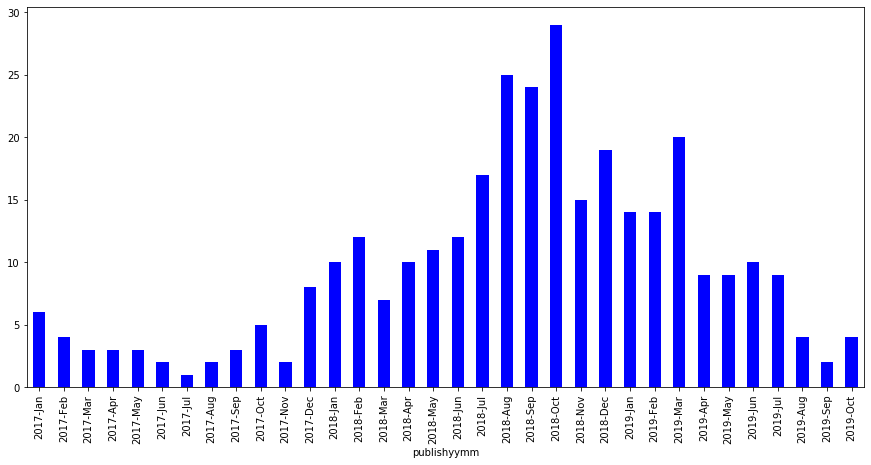

In [43]:
datacamp[datacamp["publishdate"]>='2017-01-01'].sort_values(by="publishdate", ascending=True).groupby([datacamp['publishyymm']],sort=False).size().plot(kind='bar', figsize=(15,7), color='b')

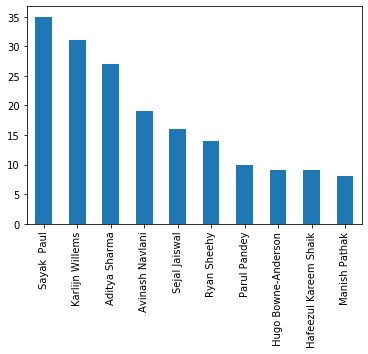

In [44]:
datacamp[datacamp["publishdate"]>='2017-01-01']["author"].value_counts(sort=True, ascending=False)[:10].plot(kind='bar')

In [58]:
topauthors = datacamp[datacamp["publishdate"]>='2017-01-01']["author"].value_counts(sort=True, ascending=False)[:10].index

In [65]:
#Tutorials Paced over Timeline
dh = datacamp[datacamp["publishdate"]>='2017-01-01'].sort_values(by="publishdate", ascending=True).set_index("publishdate", drop=False)

In [66]:
dh.columns

Index(['author', 'publishdate', 'title', 'description', 'publishyymm',
       'posts'],
      dtype='object')

In [67]:
dh["publishdateone"] = pd.to_datetime(dh.publishdate.astype(str).str[0:7]+'-01')

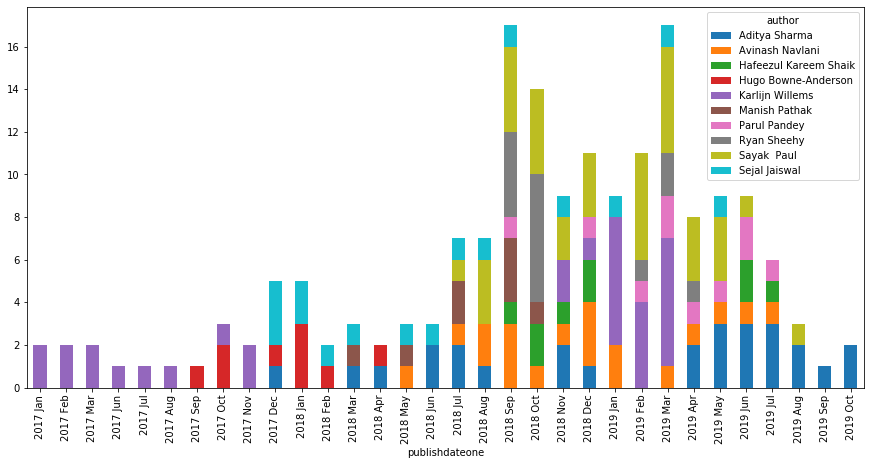

In [68]:
dhp = dh[dh["author"].isin(topauthors)].pivot_table(index="publishdateone",values="posts",columns="author", aggfunc=np.sum)
fig, ax = plt.subplots(figsize=(15,7))
dhp.plot(ax=ax, kind='bar', stacked=True)
ticklabels = [item.strftime('%Y %b') for item in dhp.index]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))


In [3]:
url3 = 'http://zpp.rospotrebnadzor.ru/Forum/Appeals/AjaxindexList?page=1&searchtext=&categories=%5B%5D'
html3 = urlopen(url3)
soup3 = BeautifulSoup(html3, 'html')


In [4]:
pages3 = [i.text for i in soup3.find_all(class_='page-number')]
pages3

['2', '3', '2035', '2036']

In [5]:
lastpage3 = pages3[-1]
lastpage3

'2036'

In [6]:
soup3

<html><body><div id="list-overlay"></div>
<div class="appeals-list-container">
<div class="row">
<div class="col-lg-12">
<form onsubmit="SubmitForm(this)">
<div class="input-group">
<input autocomplete="off" class="form-control" id="SearchText" name="SearchText" placeholder="Введите фразу для поиска..." type="text" value=""/>
<span class="input-group-btn appeal-search-custom-btn">
<button class="btn btn-default" type="button">
                            Найти
                        </button>
</span>
</div>
</form>
</div>
</div>
<div class="row">
<div class="col-md-12">
<div class="appeal-element">
<div class="row">
<div class="col-md-12">
<p class="appeal-cat-title">Розничная торговля</p>
</div>
</div>
<div class="row">
<div class="col-md-12">
<a class="appeal-title-link" href="/Forum/Appeals/Details/12851">
<span class="custom-underline">
                    Возврат товара
                </span>
</a>
</div>
</div>
<div class="row">
<div class="col-md-12">
<p class="appeal-element-b

In [83]:
findurls = []
findurls.append([i.get('href') for i in soup3.find_all(class_='appeal-title-link')])
print(findurls)


[['/Forum/Appeals/Details/12828', '/Forum/Appeals/Details/12797', '/Forum/Appeals/Details/12796', '/Forum/Appeals/Details/12788', '/Forum/Appeals/Details/12784']]


In [84]:
findtitles = []
findtitles.append([i.text for i in soup3.find_all(class_='custom-underline')])
print(findtitles)


[['\r\n                    МТС обманули на деньги (видео могу выслать)\r\n                ', '\r\n                    неоказание услуг связи ПАО Мегафон\r\n                ', '\r\n                    Незаконное отключение электроэнергии\r\n                ', '\r\n                    Грязь и антисанитария в сан.узлах аэропорта Толмачево\r\n                ', '\r\n                    Некачественный товар\r\n                ']]


In [54]:
findregion = []
findregion.append([i.text for i in soup3.find_all(class_='appeal-element-bottom') if 'Регион' in i.text])
print(findregion)

[[' Регион:  Республика Башкортостан', ' Регион:  Орловская область', ' Регион:  Ленинградская область', ' Регион:  Архангельская область', ' Регион:  Ростовская область']]


In [59]:
findauthor = []
findauthor.append([i.text for i in soup3.find_all(class_='appeal-element-bottom') if 'автор' in i.text.lower()])
print(findauthor)

[[' Автор:  Ирина', ' Автор:  Екатерина ', ' Автор:  ольга', ' Автор:  Иван', ' Автор:  Наталия Леонидовна']]


In [57]:
findpublishdate = []
findpublishdate.append([i.text for i in soup3.find_all(class_='appeal-element-bottom') if 'Опубликовано' in i.text])
print(findpublishdate)

[[' Опубликовано:  28.10.2019', ' Опубликовано:  26.10.2019', ' Опубликовано:  25.10.2019', ' Опубликовано:  25.10.2019', ' Опубликовано:  24.10.2019']]


In [58]:
findcategory = []
findcategory.append([i.text for i in soup3.find_all(class_='appeal-cat-title')])
print(findcategory)

[['Розничная торговля', 'Услуги связи', 'Розничная торговля', 'Розничная торговля', 'Услуги связи']]


In [7]:
links=[]
author=[]
publishdate=[]
region=[]
category=[]
title=[]

In [61]:
links_second = []

In [62]:
for cp in np.arange(1,int(lastpage3)+1):
    url = "http://zpp.rospotrebnadzor.ru/Forum/Appeals/AjaxindexList?page=" + str(cp) + "&searchtext=&categories=%5B%5D"
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html')
    links_second.append([i.get('href') for i in soup.find_all(class_='appeal-title-link')])
    title.append([i.text for i in soup.find_all(class_='custom-underline')])
    author.append([i.text for i in soup.find_all(class_='appeal-element-bottom') if 'автор' in i.text.lower()])
    publishdate.append([i.text for i in soup.find_all(class_='appeal-element-bottom') if 'опубликовано' in i.text.lower()])
    region.append([i.text for i in soup.find_all(class_='appeal-element-bottom') if 'регион' in i.text.lower()])
    category.append([i.text for i in soup.find_all(class_='appeal-cat-title')])
    if cp%100==0:
        print(cp)
    time.sleep(3)
print ("Done!")

100


URLError: <urlopen error [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера>

In [70]:
len(links_second)

2037

In [64]:
for cp in np.arange(116,int(lastpage3)+1):
    url = "http://zpp.rospotrebnadzor.ru/Forum/Appeals/AjaxindexList?page=" + str(cp) + "&searchtext=&categories=%5B%5D"
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html')
    links_second.append([i.get('href') for i in soup.find_all(class_='appeal-title-link')])
    title.append([i.text for i in soup.find_all(class_='custom-underline')])
    author.append([i.text for i in soup.find_all(class_='appeal-element-bottom') if 'автор' in i.text.lower()])
    publishdate.append([i.text for i in soup.find_all(class_='appeal-element-bottom') if 'опубликовано' in i.text.lower()])
    region.append([i.text for i in soup.find_all(class_='appeal-element-bottom') if 'регион' in i.text.lower()])
    category.append([i.text for i in soup.find_all(class_='appeal-cat-title')])
    if cp%100==0:
        print(cp)
    time.sleep(3)
print ("Done!")

200
300
400
500
600
700
800
900
1000
1100
1200
1300


URLError: <urlopen error [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера>

In [66]:
for cp in np.arange(1360,int(lastpage3)+1):
    url = "http://zpp.rospotrebnadzor.ru/Forum/Appeals/AjaxindexList?page=" + str(cp) + "&searchtext=&categories=%5B%5D"
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html')
    links_second.append([i.get('href') for i in soup.find_all(class_='appeal-title-link')])
    title.append([i.text for i in soup.find_all(class_='custom-underline')])
    author.append([i.text for i in soup.find_all(class_='appeal-element-bottom') if 'автор' in i.text.lower()])
    publishdate.append([i.text for i in soup.find_all(class_='appeal-element-bottom') if 'опубликовано' in i.text.lower()])
    region.append([i.text for i in soup.find_all(class_='appeal-element-bottom') if 'регион' in i.text.lower()])
    category.append([i.text for i in soup.find_all(class_='appeal-cat-title')])
    if cp%100==0:
        print(cp)
    time.sleep(3)
print ("Done!")

1400
1500
1600
1700
1800
1900
2000
Done!


In [78]:
print(links_second[115:118])
print(region[115:118])
print(author[115:118])
print(publishdate[115:118])
print(title[115:118])
print(category[115:118])

[['/Forum/Appeals/Details/11892', '/Forum/Appeals/Details/11891', '/Forum/Appeals/Details/11889', '/Forum/Appeals/Details/11888', '/Forum/Appeals/Details/11886'], ['/Forum/Appeals/Details/11892', '/Forum/Appeals/Details/11891', '/Forum/Appeals/Details/11889', '/Forum/Appeals/Details/11888', '/Forum/Appeals/Details/11886'], ['/Forum/Appeals/Details/11884', '/Forum/Appeals/Details/11883', '/Forum/Appeals/Details/11881', '/Forum/Appeals/Details/11880', '/Forum/Appeals/Details/11879']]
[[' Регион:  Свердловская область', ' Регион:  Новосибирская область', ' Регион:  Московская область', ' Регион:  Ярославская область', ' Регион:  Республика Башкортостан'], [' Регион:  Свердловская область', ' Регион:  Новосибирская область', ' Регион:  Московская область', ' Регион:  Ярославская область', ' Регион:  Республика Башкортостан'], [' Регион:  Челябинская область', ' Регион:  Ленинградская область', ' Регион:  Ульяновская область', ' Регион:  г. Санкт-Петербург', ' Регион:  Республика Башкортост

In [79]:
links_second.pop(116)
region.pop(116)
author.pop(116)
publishdate.pop(116)
title.pop(116)
category.pop(116)

['Прочие виды деятельности',
 'Розничная торговля',
 'Общественное питание',
 'Прочие виды деятельности',
 'Услуги связи']

In [80]:
print(links_second[115:118])
print(region[115:118])
print(author[115:118])
print(publishdate[115:118])
print(title[115:118])
print(category[115:118])

[['/Forum/Appeals/Details/11892', '/Forum/Appeals/Details/11891', '/Forum/Appeals/Details/11889', '/Forum/Appeals/Details/11888', '/Forum/Appeals/Details/11886'], ['/Forum/Appeals/Details/11884', '/Forum/Appeals/Details/11883', '/Forum/Appeals/Details/11881', '/Forum/Appeals/Details/11880', '/Forum/Appeals/Details/11879'], ['/Forum/Appeals/Details/11878', '/Forum/Appeals/Details/11877', '/Forum/Appeals/Details/11875', '/Forum/Appeals/Details/11874', '/Forum/Appeals/Details/11872']]
[[' Регион:  Свердловская область', ' Регион:  Новосибирская область', ' Регион:  Московская область', ' Регион:  Ярославская область', ' Регион:  Республика Башкортостан'], [' Регион:  Челябинская область', ' Регион:  Ленинградская область', ' Регион:  Ульяновская область', ' Регион:  г. Санкт-Петербург', ' Регион:  Республика Башкортостан'], [' Регион:  Пензенская область', ' Регион:  Вологодская область', ' Регион:  Московская область', ' Регион:  Республика Башкортостан', ' Регион:  Саратовская область']

In [81]:
print(links_second[1359:1362])
print(region[1359:1362])
print(author[1359:1362])
print(publishdate[1359:1362])
print(title[1359:1362])
print(category[1359:1362])

[['/Forum/Appeals/Details/4014', '/Forum/Appeals/Details/4013', '/Forum/Appeals/Details/4012', '/Forum/Appeals/Details/4010', '/Forum/Appeals/Details/4009'], ['/Forum/Appeals/Details/4008', '/Forum/Appeals/Details/4007', '/Forum/Appeals/Details/4006', '/Forum/Appeals/Details/4004', '/Forum/Appeals/Details/4002'], ['/Forum/Appeals/Details/4001', '/Forum/Appeals/Details/4000', '/Forum/Appeals/Details/3999', '/Forum/Appeals/Details/3998', '/Forum/Appeals/Details/3997']]
[[' Регион:  г. Санкт-Петербург', ' Регион:  Московская область', ' Регион:  Ярославская область', ' Регион:  Саратовская область', ' Регион:  Московская область'], [' Регион:  Курганская область', ' Регион:  Воронежская область', ' Регион:  Красноярский край', ' Регион:  Республика Татарстан (Татарстан)', ' Регион:  г. Москва'], [' Регион:  Республика Башкортостан', ' Регион:  Нижегородская область', ' Регион:  Московская область', ' Регион:  Московская область', ' Регион:  Ростовская область']]
[[' Автор:  Ирина Трофимов

In [82]:
#Flattening List of Lists
links_second_flat = [y for x in links_second for y in x]
regionflat = [y for x in region for y in x]
authorflat = [y for x in author for y in x]
publishdateflat = [y for x in publishdate for y in x]
titleflat = [y for x in title for y in x]
categoryflat = [y for x in category for y in x]

In [83]:
print(len(links_second_flat))
print(len(regionflat))
print(len(authorflat))
print(len(publishdateflat))
print(len(titleflat))
print(len(categoryflat))

10179
10179
10179
10179
10209
10179


In [93]:
titleflatdf = pd.DataFrame(data=titleflat, columns=['titles'])
titleflatdf.head()

,titles
0,\r\n Возврат товара\r\n ...
1,\r\n МТС обманули на деньги...
2,\r\n отравление в общепите\...
3,\r\n Обман интернет магазин...
4,\r\n неоказание услуг связи...


In [94]:
titleflatdf['titles'].value_counts()

\r\n                    Жалоба\r\n                                                                                               74
\r\n                    Возврат товара\r\n                                                                                       46
\r\n                    Некачественный товар\r\n                                                                                 23
\r\n                    Возврат денежных средств\r\n                                                                             22
\r\n                    жалоба\r\n                                                                                               21
\r\n                    Мошенничество\r\n                                                                                        15
\r\n                    Обращение\r\n                                                                                            15
\r\n                    Вопрос\r\n                                          

In [96]:
publishdateformatted = [datetime.strptime(re.sub(' Опубликовано:  ', '', a), "%d.%m.%Y") for a in publishdateflat]
print(publishdateformatted)

[datetime.datetime(2019, 10, 28, 0, 0), datetime.datetime(2019, 10, 26, 0, 0), datetime.datetime(2019, 10, 25, 0, 0), datetime.datetime(2019, 10, 25, 0, 0), datetime.datetime(2019, 10, 24, 0, 0), datetime.datetime(2019, 10, 24, 0, 0), datetime.datetime(2019, 10, 23, 0, 0), datetime.datetime(2019, 10, 23, 0, 0), datetime.datetime(2019, 10, 23, 0, 0), datetime.datetime(2019, 10, 22, 0, 0), datetime.datetime(2019, 10, 22, 0, 0), datetime.datetime(2019, 10, 22, 0, 0), datetime.datetime(2019, 10, 22, 0, 0), datetime.datetime(2019, 10, 22, 0, 0), datetime.datetime(2019, 10, 22, 0, 0), datetime.datetime(2019, 10, 22, 0, 0), datetime.datetime(2019, 10, 21, 0, 0), datetime.datetime(2019, 10, 21, 0, 0), datetime.datetime(2019, 10, 20, 0, 0), datetime.datetime(2019, 10, 19, 0, 0), datetime.datetime(2019, 10, 19, 0, 0), datetime.datetime(2019, 10, 18, 0, 0), datetime.datetime(2019, 10, 18, 0, 0), datetime.datetime(2019, 10, 18, 0, 0), datetime.datetime(2019, 10, 18, 0, 0), datetime.datetime(2019, 

In [97]:
#Making a Data Frame and Saving as CSV File
cdata = {'links':links_second_flat,"author":authorflat,"publishdate":publishdateflat, 'publishdateformatted': publishdateformatted, "region":regionflat, 'category': categoryflat}
df = pd.DataFrame(data = cdata)
df.to_csv("zpp301019.csv", header=True, index=False, encoding='utf-8')

In [8]:
for cp in np.arange(1,int(lastpage3)+1):
    url = "http://zpp.rospotrebnadzor.ru/Forum/Appeals/AjaxindexList?page=" + str(cp) + "&searchtext=&categories=%5B%5D"
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html')
    links.append([i.get('href') for i in soup.find_all(class_='appeal-title-link')])
#     author.append([i.text for i in soup.find_all(class_='jsx-566588255 name')])
#     publishdate.append([i.text for i in soup.find_all(class_='jsx-566588255 date')])
#     title.append([i.text for i in soup.find_all(class_='jsx-379356511 blue')])
    if cp%100==0:
        print(cp)
    time.sleep(3)
print ("Done!")

100
200
300
400
500
600
700
800


URLError: <urlopen error [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера>

In [13]:
len(links)

1994

In [14]:
links[-1]

['/Forum/Appeals/Details/9443',
 '/Forum/Appeals/Details/9442',
 '/Forum/Appeals/Details/9441',
 '/Forum/Appeals/Details/9440',
 '/Forum/Appeals/Details/9439']

In [10]:
for cp in np.arange(837,int(lastpage3)+1):
    url = "http://zpp.rospotrebnadzor.ru/Forum/Appeals/AjaxindexList?page=" + str(cp) + "&searchtext=&categories=%5B%5D"
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html')
    links.append([i.get('href') for i in soup.find_all(class_='appeal-title-link')])
    if cp%100==0:
        print(cp)
    time.sleep(3)
print ("Done!")

900
1000
1100


URLError: <urlopen error [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера>

In [12]:
for cp in np.arange(1189,int(lastpage3)+1):
    url = "http://zpp.rospotrebnadzor.ru/Forum/Appeals/AjaxindexList?page=" + str(cp) + "&searchtext=&categories=%5B%5D"
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html')
    links.append([i.get('href') for i in soup.find_all(class_='appeal-title-link')])
    if cp%100==0:
        print(cp)
    time.sleep(3)
print ("Done!")

1200
1300
1400
1500
1600
1700
1800
1900


URLError: <urlopen error [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера>

In [41]:
for cp in np.arange(1,int(lastpage3)+1):
    url = "http://zpp.rospotrebnadzor.ru/Forum/Appeals/AjaxindexList?page=" + str(cp) + "&searchtext=&categories=%5B%5D"
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html')
    title.append([])
    if cp%100==0:
        print(cp)
    time.sleep(3)
print ("Done!")

KeyboardInterrupt: 

In [ ]:
for cp in np.arange(1994,int(lastpage3)+1):
    url = "http://zpp.rospotrebnadzor.ru/Forum/Appeals/AjaxindexList?page=" + str(cp) + "&searchtext=&categories=%5B%5D"
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html')
    title.append([i.text for i in soup.find_all(class_='custom-underline')])
    if cp%100==0:
        print(cp)
    time.sleep(3)
print ("Done!")

In [15]:
linksflat = [y for x in links for y in x]

In [17]:
len(linksflat)

10184

In [21]:
linksflat[-10:-1]

['/Forum/Appeals/Details/67',
 '/Forum/Appeals/Details/66',
 '/Forum/Appeals/Details/65',
 '/Forum/Appeals/Details/64',
 '/Forum/Appeals/Details/62',
 '/Forum/Appeals/Details/61',
 '/Forum/Appeals/Details/60',
 '/Forum/Appeals/Details/59',
 '/Forum/Appeals/Details/58']

In [22]:
linksflat[0:10]

['/Forum/Appeals/Details/12851',
 '/Forum/Appeals/Details/12828',
 '/Forum/Appeals/Details/12821',
 '/Forum/Appeals/Details/12815',
 '/Forum/Appeals/Details/12797',
 '/Forum/Appeals/Details/12796',
 '/Forum/Appeals/Details/12788',
 '/Forum/Appeals/Details/12786',
 '/Forum/Appeals/Details/12784',
 '/Forum/Appeals/Details/12781']

In [28]:
#Are all of the urls unique?
len(linksflat) == len(set(linksflat))
len(linksflat)
len(set(linksflat))

10179

In [32]:
linksflat = set(linksflat)
linksflat = list(linksflat)

In [38]:
urlarticle = 'http://zpp.rospotrebnadzor.ru' + linksflat[2]
htmlarticle = urlopen(urlarticle)
souparticle = BeautifulSoup(htmlarticle, 'html')

In [39]:
souparticle

<!DOCTYPE html>
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta name="description"/>
<meta name="keywords"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="lH6Z9PWIRq3180Y6" name="sputnik-verification"/>
<title>Собака воет и лает целый день - Виртуальная приемная - Роспотребнадзор</title>
<link href="/fonts/firasans/firasans.css" rel="stylesheet"/>
<!--[if lt IE 9]>
    <script src="http://ie7-js.googlecode.com/svn/version/2.1(beta4)/IE9.js"></script>
    <![endif]-->
<link href="/Skin/rpn2/font/font.css" rel="stylesheet"/>
<link href="/Content/font-awesome.min.css" rel="stylesheet"/>
<link href="/Content/css?v=NQGD633p8LVb3M5_IWEqJHuZWbhsiDqS1PMl-WIDzL01" rel="stylesheet"/>
<script src="/bundles/modernizr?v=inCVuEFe6J4Q07A0AcRsbJic_UE5MwpRMNGcOtk94TE1"></script>
<link href=

In [45]:
namearticle = [i.text for i in souparticle.find_all(class_='appeal-details-auth-name')]
appealtxtarticle = [i.text for i in souparticle.find_all(class_='appeal-details-message')]
print(namearticle)
print(appealtxtarticle)

['Елена']
['Здравствуйте! Подскажите, что можно сделать? Собака воет и лает систематически в квартире, с 8.00 до 23.00, чем мешает спокойному нахождению в квартире, дети не хотят спать, даже включенный телевизор не заглушает вой, хозяйка на контакт не идет. У нас 17-этажный дом, по 6 квартир на этаже, половина подъезда страдает от бесконечного лая. Как заставить хозяйку убрать собаку?']


In [46]:
timearticle = [i.text for i in souparticle.find_all(class_='appeal-element-bottom')]
print(timearticle)

[' Опубликовано:  16.01.2018 в 21:51']


In [48]:
answertxtarticle = [i.text for i in souparticle.find_all(class_='appeal-comments-message')]
timeanswer = [i.text for i in souparticle.find_all(class_='appeal-comments-date')]
print(timeanswer)
print(answertxtarticle)

['17.01.2018 в 10:56']
['Уважаемая Елена! По данному вопросу рекомендуем Вам обратиться в отдел полиции по месту жительства к участковому уполномоченному, который выполняет функции по охране порядка на вверенной ему территории.']


In [101]:
AuthorAppeal = []
TextAppeal = []
TimeAppeal = []
TextAnswer = []
TimeAnswer = []
AppealID = []

In [104]:
for lnk in np.arange(0, len(links_second_flat)):
    urlarticle = 'http://zpp.rospotrebnadzor.ru' + linksflat[lnk]
    htmlarticle = urlopen(urlarticle)
    souparticle = BeautifulSoup(htmlarticle, 'html')
    AuthorAppeal.append([i.text for i in souparticle.find_all(class_='appeal-details-auth-name')])
    TextAppeal.append([i.text for i in souparticle.find_all(class_='appeal-details-message')])
    TimeAppeal.append([i.text for i in souparticle.find_all(class_='appeal-element-bottom')])
    TextAnswer.append([i.text for i in souparticle.find_all(class_='appeal-comments-message')])
    TimeAnswer.append([i.text for i in souparticle.find_all(class_='appeal-comments-date')])
    AppealID.append(int(re.sub('http://zpp.rospotrebnadzor.ru/Forum/Appeals/Details/', '', urlarticle)))
    if lnk%100==0:
        print(lnk)
    time.sleep(3)
print ("Done!")

Done!


In [105]:
print(len(AuthorAppeal))
print(len(TextAppeal))
print(len(TimeAppeal))
print(len(TextAnswer))
print(len(TimeAnswer))
print(len(AppealID))

10179
10179
10179
10179
10179
10179


In [130]:
#Flattening List of Lists
AuthorAppealFlat = []
TextAppealFlat = []
TimeAppealFlat = []
TextAnswerFlat = []
TimeAnswerFlat = []


AuthorAppealFlat = [i[0] for i in AuthorAppeal]
TextAppealFlat = [i[0] for i in TextAppeal]
TimeAppealFlat = [i[0] for i in TimeAppeal]
TextAnswerFlat = [i[0] for i in TextAnswer]
TimeAnswerFlat = [i[0] for i in TimeAnswer]

In [131]:
EmptyTextAnswer = []
EmptyTimeAnswer = []

for i in range(0, len(TextAnswer)-1):
    if len(TextAnswer[i]) == 0:
        EmptyTextAnswer.append(i)
        
for i in range(0, len(TimeAnswer)-1):
    if len(TimeAnswer[i]) == 0:
        EmptyTimeAnswer.append(i)

In [132]:
print(EmptyTextAnswer)
print(EmptyTimeAnswer)

[55, 63, 262, 380, 440, 476, 666, 688, 950, 1261, 1297, 1826, 2254, 2256, 2315, 2444, 2467, 2486, 2515, 2680, 2888, 2912, 3083, 3302, 3357, 3561, 3699, 3793, 3826, 4076, 4110, 4138, 4150, 4168, 4287, 4413, 4415, 4652, 4728, 4790, 4807, 5111, 5136, 5174, 5535, 5583, 5598, 5691, 6160, 6288, 6334, 6414, 6760, 6782, 6798, 6858, 6917, 7159, 7325, 7473, 7588, 8266, 8539, 8630, 8840, 8860, 8934, 9151, 9226, 9338, 9587, 9705]
[55, 63, 262, 380, 440, 476, 666, 688, 950, 1261, 1297, 1826, 2254, 2256, 2315, 2444, 2467, 2486, 2515, 2680, 2888, 2912, 3083, 3302, 3357, 3561, 3699, 3793, 3826, 4076, 4110, 4138, 4150, 4168, 4287, 4413, 4415, 4652, 4728, 4790, 4807, 5111, 5136, 5174, 5535, 5583, 5598, 5691, 6160, 6288, 6334, 6414, 6760, 6782, 6798, 6858, 6917, 7159, 7325, 7473, 7588, 8266, 8539, 8630, 8840, 8860, 8934, 9151, 9226, 9338, 9587, 9705]


In [133]:
EmptyTextAnswer == EmptyTimeAnswer

True

In [134]:
links_second_flat[55]

'/Forum/Appeals/Details/12679'

In [135]:
urlarticle2 = 'http://zpp.rospotrebnadzor.ru' + linksflat[55]
htmlarticle2 = urlopen(urlarticle2)
souparticle2 = BeautifulSoup(htmlarticle2, 'html')
souparticle2

<!DOCTYPE html>
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta name="description"/>
<meta name="keywords"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="lH6Z9PWIRq3180Y6" name="sputnik-verification"/>
<title>Образец заявления - Виртуальная приемная - Роспотребнадзор</title>
<link href="/fonts/firasans/firasans.css" rel="stylesheet"/>
<!--[if lt IE 9]>
    <script src="http://ie7-js.googlecode.com/svn/version/2.1(beta4)/IE9.js"></script>
    <![endif]-->
<link href="/Skin/rpn2/font/font.css" rel="stylesheet"/>
<link href="/Content/font-awesome.min.css" rel="stylesheet"/>
<link href="/Content/css?v=NQGD633p8LVb3M5_IWEqJHuZWbhsiDqS1PMl-WIDzL01" rel="stylesheet"/>
<script src="/bundles/modernizr?v=inCVuEFe6J4Q07A0AcRsbJic_UE5MwpRMNGcOtk94TE1"></script>
<link href="/Skin/rpn2/

In [137]:
type(EmptyTextAnswer[0])

int

In [138]:
for i in EmptyTextAnswer:
    TextAnswer[i] = ['No response']
    TimeAnswer[i] = ['No response']

In [139]:
TextAnswerFlat = [i[0] for i in TextAnswer]
TimeAnswerFlat = [i[0] for i in TimeAnswer]

In [ ]:
AuthorAppealFlat[0:5]
TextAppealFlat[0:5]
TimeAppealFlat[0:5]
TextAnswerFlat[0:5]
TimeAnswerFlat[0:5]
AppealID[0:5]

In [146]:
print(AuthorAppealFlat[0:5])
#print(TextAppealFlat[0:5])
print(TimeAppealFlat[0:5])
#print(TextAnswerFlat[0:5])
print(TimeAnswerFlat[0:5])
print(AppealID[0:5])

['Наталья', 'Губин ', 'Елена', 'Елена ', 'Михаил']
['21.11.2017 в 8:30', '22.06.2017 в 18:40', '16.01.2018 в 21:51', '11.04.2017 в 2:54', '30.06.2017 в 17:23']
['22.11.2017 в 9:51', '26.06.2017 в 14:48', '17.01.2018 в 10:56', '12.04.2017 в 10:04', '11.07.2017 в 17:09']
[4371, 3009, 5033, 2365, 3093]


In [145]:
for i in range(0, len(TimeAppealFlat)):
    TimeAppealFlat[i] = re.sub(' Опубликовано:  ', '', TimeAppealFlat[i])
    

In [165]:
TimeAppealFormatted = [datetime.strptime(re.sub(' в ', ' ', a), "%d.%m.%Y %H:%M") for a in TimeAppealFlat]
TimeAnswerFormatted = [datetime.strptime(re.sub(' в ', ' ', a), "%d.%m.%Y %H:%M") if a!='No response' else a for a in TimeAnswerFlat]

In [166]:
print(len(TimeAppealFormatted))
print(len(TimeAnswerFormatted))

10179
10179


In [167]:
fulldata = {
    'id':AppealID,
    'links':links_second_flat,
    "region":regionflat,
    'category': categoryflat,
    "author":authorflat,
    'author2':AuthorAppealFlat,
    "publishdate":publishdateflat,
    'publishdateformatted': publishdateformatted,
    'publishtime':TimeAppealFormatted,
    'appeal':TextAppealFlat,
    'answerpublishtime':TimeAnswerFormatted,
    'answer':TextAnswerFlat
}
fulldf = pd.DataFrame(data = fulldata)

In [168]:
fulldf.head()

,id,links,region,category,author,author2,publishdate,publishdateformatted,publishtime,appeal,answerpublishtime,answer
0,4371,/Forum/Appeals/Details/12851,Регион: Республика Башкортостан,Розничная торговля,Автор: Ирина,Наталья,Опубликовано: 28.10.2019,2019-10-28,2017-11-21 08:30:00,Здравствуйте. У нас последний этаж так как все...,2017-11-22 09:51:00,"Здравствуйте, Наталья!\r\nПоставленные Вами во..."
1,3009,/Forum/Appeals/Details/12828,Регион: Орловская область,Услуги связи,Автор: Екатерина,Губин,Опубликовано: 26.10.2019,2019-10-26,2017-06-22 18:40:00,В течении десяти месяцев пользовались интернет...,2017-06-26 14:48:00,Управление Федеральной службы по надзору в сфе...
2,5033,/Forum/Appeals/Details/12821,Регион: Ленинградская область,Розничная торговля,Автор: ольга,Елена,Опубликовано: 25.10.2019,2019-10-25,2018-01-16 21:51:00,"Здравствуйте! Подскажите, что можно сделать? С...",2018-01-17 10:56:00,Уважаемая Елена! По данному вопросу рекомендуе...
3,2365,/Forum/Appeals/Details/12815,Регион: Архангельская область,Розничная торговля,Автор: Иван,Елена,Опубликовано: 25.10.2019,2019-10-25,2017-04-11 02:54:00,Хотела повторно отправить жалобу на ИП (наруше...,2017-04-12 10:04:00,"В настоящее время, на сайте Управления предусм..."
4,3093,/Forum/Appeals/Details/12797,Регион: Ростовская область,Услуги связи,Автор: Наталия Леонидовна,Михаил,Опубликовано: 24.10.2019,2019-10-24,2017-06-30 17:23:00,Здравствуйте.\r\nВ гарантийный период у нас пр...,2017-07-11 17:09:00,"Уважаемый Михаил!\r\n\r\nИсходя из информации,..."


In [169]:
firstdata = {
    'links':links_second_flat,
    "region":regionflat,
    'category': categoryflat,
    "author":authorflat,
    "publishdate":publishdateflat,
    'publishdateformatted': publishdateformatted,
}
seconddata = {
    'id':AppealID,
    'author2':AuthorAppealFlat,
    'publishtime':TimeAppealFormatted,
    'appeal':TextAppealFlat,
    'answerpublishtime':TimeAnswerFormatted,
    'answer':TextAnswerFlat
}

firstdf = pd.DataFrame(data = firstdata)
seconddf = pd.DataFrame(data = seconddata)

In [177]:
firstdf.head()

,links,region,category,author,publishdate,publishdateformatted
0,/Forum/Appeals/Details/12851,Регион: Республика Башкортостан,Розничная торговля,Автор: Ирина,Опубликовано: 28.10.2019,2019-10-28
1,/Forum/Appeals/Details/12828,Регион: Орловская область,Услуги связи,Автор: Екатерина,Опубликовано: 26.10.2019,2019-10-26
2,/Forum/Appeals/Details/12821,Регион: Ленинградская область,Розничная торговля,Автор: ольга,Опубликовано: 25.10.2019,2019-10-25
3,/Forum/Appeals/Details/12815,Регион: Архангельская область,Розничная торговля,Автор: Иван,Опубликовано: 25.10.2019,2019-10-25
4,/Forum/Appeals/Details/12797,Регион: Ростовская область,Услуги связи,Автор: Наталия Леонидовна,Опубликовано: 24.10.2019,2019-10-24


In [2]:
firstdf['links'] = firstdf['links'].apply(lambda x: re.sub('/Forum/Appeals/Details/', '', x))

NameError: name 'firstdf' is not defined

# How to Scrape the Web using Python with ScraPy Spiders